In [76]:
import numpy as np
import numpy.fft as fft
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cfenergydata = pd.read_csv("../sample_data/19992009electricitybyplanningarea.csv");

In [42]:
data = cfenergydata[cfenergydata["Planning Area Description"] == "Burbank, Glendale, and Pasadena"].sort_values("Year")

In [43]:
data

,Planning Area Description,Year,Ag & Water Pump,Commercial Building,Commercial Other,Industry,Mining & Construction,Residential,Streetlight,Total Usage
0,"Burbank, Glendale, and Pasadena",1990,33.152177,1428.801194,61.617858,503.809832,46.284311,858.249845,30.832279,2962.747496
1,"Burbank, Glendale, and Pasadena",1991,28.923706,1415.262278,60.383775,398.092672,40.168765,796.672065,30.808334,2770.311595
2,"Burbank, Glendale, and Pasadena",1992,27.841726,1559.789686,62.946867,376.337240,42.528526,842.290174,30.098094,2941.832313
3,"Burbank, Glendale, and Pasadena",1993,25.297164,1711.631489,55.586555,312.426175,43.048229,824.939994,31.095867,3004.025473
4,"Burbank, Glendale, and Pasadena",1994,26.316572,1757.120296,51.752164,268.874134,41.541199,838.677628,30.543356,3014.825349
5,"Burbank, Glendale, and Pasadena",1995,27.509078,1816.959435,60.518988,250.286468,49.663682,861.638616,30.526090,3097.102357
6,"Burbank, Glendale, and Pasadena",1996,25.449786,1873.741664,60.091919,252.704357,52.560938,875.130743,28.046960,3167.726367
7,"Burbank, Glendale, and Pasadena",1997,22.056973,1932.623964,72.496227,252.056254,48.696291,888.849286,33.730411,3250.509406
8,"Burbank, Glendale, and Pasadena",1998,21.080127,1989.499604,70.591572,249.238438,54.225839,895.993534,33.954870,3314.583984
9,"Burbank, Glendale, and Pasadena",1999,20.849252,1968.432062,72.449147,231.592228,55.615291,875.574003,32.539377,3257.051360


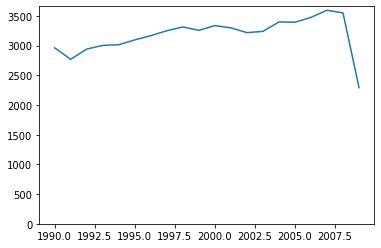

In [46]:
fig, ax = plt.subplots()
lines = ax.plot(data["Year"], data["Total Usage"])
ax.set_ylim(0)
plt.show()

In [51]:
fft = numpy.fft.fft
ifft = numpy.fft.ifft

In [67]:
ft = fft(data["Total Usage"])
ft[np.abs(ft) < 2000] = 0
fd = np.real(ifft(ft))

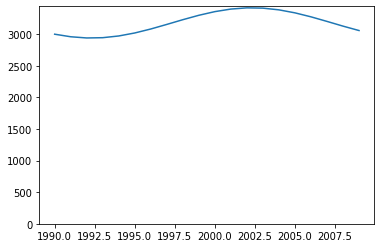

In [68]:
fig, ax = plt.subplots()
lines = ax.plot(data["Year"], fd)
ax.set_ylim(0)
plt.show()

In [124]:
def fourierExtrapolation(x, n_predict, n_harm):
    # x is an array of past data
    # n_predict is how many data points we want to predict for the future
    # n_harm is the number of harmonics in model
    n = x.size                          # Get the length of the data array
    t = np.arange(0, n)                 # Create a domain for the data
    slope = np.polyfit(t, x, 1)[0]      # Fit a linear trendline on the relationship between t and x
    detrended_x = x - slope * t         # Subtract the linear trendline from the data array
    dft = fft.fft(detrended_x)          # Compute DFT
    f = fft.fftfreq(n)                  # Get the set of frequencies in the domain of the DFT
    indices = np.argsort(np.abs(f))     # Create a list of DFT indices sorted by abs() of their frequency
    
    # Select only the lowest frequencies (to eliminate noise)
    low_freq = indices[: 1 + n_harm * 2]
 
    t = np.arange(0, n + n_predict)     # Create a domain for the reconstituted signal
    
    restored_sig = np.zeros(len(t))
    for i in low_freq:                  # Iterate over the low frequencies we selected
        # Calculate the amplitude and phase of the oscillation
        amplitude = np.absolute(dft[i]) / n
        phase = np.angle(dft[i])
        # Add a new layer of oscillation corresponding to this frequency
        restored_sig += amplitude * np.cos(2 * np.pi * f[i] * t + phase)
    # Reintroduce the linear trend we determined earlier
    return restored_sig + slope * t

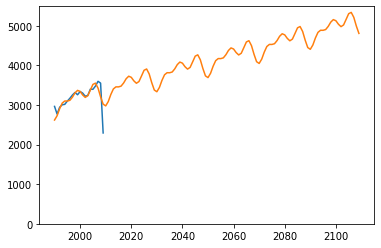

In [125]:
n_predict = 100
extrapolation = fourierExtrapolation(data["Total Usage"], n_predict, 3)
start = np.array(data["Year"])[-1]+1
x = np.append(np.array(data["Year"]), np.arange(start, start + n_predict))

fig, ax = plt.subplots()
past, = ax.plot(data["Year"], data["Total Usage"])
pred, = ax.plot(x, extrapolation)
ax.set_ylim(0)
plt.show()

In [98]:
s1 = np.linspace(0, 10, 10)
s2 = np.zeros(10)
s2 + s1

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [104]:
n = 20
f = fft.fftfreq(n)
t = list(np.arange(0, n))
t.sort(key = lambda i: np.abs(f[i]))
print(t)
print(np.argsort(np.abs(f)))

[0, 1, 19, 2, 18, 3, 17, 4, 16, 5, 15, 6, 14, 7, 13, 8, 12, 9, 11, 10]
[ 0 19  1  2 18  3 17  4 16  5 15  6 14  7 13  8 12  9 11 10]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


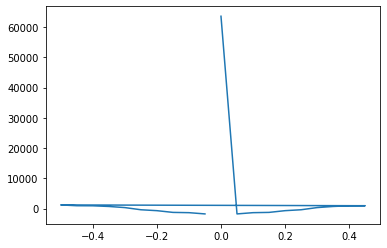

In [105]:
fig, ax = plt.subplots()
x = fft.fftfreq(len(data["Total Usage"]))
y = fft.fft(data["Total Usage"])
l, = ax.plot(x, y)
plt.show()